In [1]:
from platform import python_version
print(python_version())
import pkg_resources
import sklearn
print(sklearn. __version__)
import pandas as pd
print(pd.__version__)
import pickle
import numpy as np

3.7.4
0.21.3
0.25.1


In [2]:
from scipy.fft import fft, fftfreq
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import BarycentricInterpolator as bc
import matplotlib.pyplot as plt

In [3]:
cgm_df = pd.read_csv("./CGMData.csv")
insulin_df = pd.read_csv("./InsulinData.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(cgm_df.info())
print(insulin_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55343 entries, 0 to 55342
Data columns (total 47 columns):
Index                                  55343 non-null int64
Date                                   55343 non-null object
Time                                   55343 non-null object
New Device Time                        0 non-null float64
BG Reading (mg/dL)                     0 non-null float64
Linked BG Meter ID                     0 non-null float64
Basal Rate (U/h)                       0 non-null float64
Temp Basal Amount                      0 non-null float64
Temp Basal Type                        0 non-null float64
Temp Basal Duration (h:mm:ss)          0 non-null float64
Bolus Type                             0 non-null float64
Bolus Volume Selected (U)              0 non-null float64
Bolus Volume Delivered (U)             0 non-null float64
Bolus Duration (h:mm:ss)               0 non-null float64
Prime Type                             0 non-null float64
Prime Volume 

In [56]:
# meal_inputs = insulin_df[insulin_df['BWZ Carb Input (grams)']].notna()
# insulin_df
# print(insulin_df['BWZ Carb Input (grams)'])
# print(insulin_df['BWZ Carb Input (grams)'].notna())
all_meals = list(insulin_df[insulin_df['BWZ Carb Input (grams)'].notna() & insulin_df['BWZ Carb Input (grams)'] != 0.0]['Time'][::-1])
all_indicies = insulin_df[insulin_df['BWZ Carb Input (grams)'].notna() & insulin_df['BWZ Carb Input (grams)'] != 0.0].index[::-1].values
# print(all_meals)
# print(len(all_indicies))
filtered = []
# filtered_meals = all_meals[all_meals['']]
for i in range(0, len(all_indicies)):
    index = all_indicies[i]
    add_index = True
    date_time = insulin_df.iloc[index][['Date', 'Time']].values
    date_time = pd.to_datetime(date_time[0] + " "+ date_time[1])
    while True:
        index -= 1
        row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
        row_date_time = insulin_df[['Date', 'Time']].iloc[index].values
        row_date_time = pd.to_datetime(row_date_time[0] + " "+ row_date_time[1])
        if row_date_time > (date_time + pd.Timedelta(2, "h")) or index < 0:
            break
        if not np.isnan(row):
            add_index = False
            break
    if add_index:
        filtered.append(all_indicies[i])

print(len(filtered))
#559 X 30 Meal Data matrix


559


In [57]:
print(len(all_indicies))

747


In [58]:
carbs = []
for index in filtered:
    row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
    carbs.append(row)
n = int(np.ceil((max(carbs) - min(carbs)) / 20))
print(n)

7


In [89]:
import matplotlib.pyplot as plt

# tot = insulin_df[insulin_df['BWZ Carb Input (grams)'].notna()]['BWZ Carb Input (grams)']
# print(tot)
# print((max(insulin_df[insulin_df['BWZ Carb Input (grams)'].notna()]['BWZ Carb Input (grams)']) - min(insulin_df[insulin_df['BWZ Carb Input (grams)'].notna()]['BWZ Carb Input (grams)']))/20)


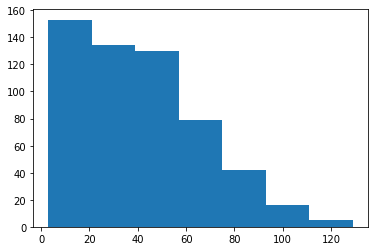

In [61]:
plt.hist(carbs, bins=n)
plt.show()

In [402]:
bins = [x for x in range(0, 20*(n), 20)]
print(bins)
my_list = [-10]
np.digitize(my_list,bins)

# def get_bin_num(data):
#     if data > 0 and data <=20:
#         return 1
#     if data > 20 and data <=40:
#         return 2

[0, 20, 40, 60, 80, 100, 120]


array([0])

In [236]:
# # all_meals = insulin_df[insulin_df['BWZ Carb Input (grams)'].isna() & insulin_df['BWZ Carb Input (grams)'] != 0.0]['BWZ Carb Input (grams)']
# # all_indicies = insulin_df[insulin_df['BWZ Carb Input (grams)'].isna() & insulin_df['BWZ Carb Input (grams)'] == 0.0].index[::-1].values

# # print(all_indicies)
# not_meals = []
# index = filtered[0]
# while True:
#     add_list = True
#     ignore = True
#     if index < 0:
#         break
#     date_time = insulin_df.iloc[index][['Date', 'Time']].values
#     date_time = pd.to_datetime(date_time[0] + " "+ date_time[1])
#     #meal data
#     while ignore:
#         index -= 1
#         row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
#         row_date_time = insulin_df[['Date', 'Time']].iloc[index].values
#         row_date_time = pd.to_datetime(row_date_time[0] + " "+ row_date_time[1])
#         if row_date_time > (date_time + pd.Timedelta(2, "h")) or index < 0:
#             ignore = False
#             break
#         if not np.isnan(row):
#             date_time = insulin_df.iloc[index][['Date', 'Time']].values
#             date_time = pd.to_datetime(date_time[0] + " "+ date_time[1])
#     original_index = index
#     date_time = insulin_df.iloc[index][['Date', 'Time']].values
#     date_time = pd.to_datetime(date_time[0] + " "+ date_time[1])
#     while True:
#         row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
#         row_date_time = insulin_df[['Date', 'Time']].iloc[index].values
#         row_date_time = pd.to_datetime(row_date_time[0] + " "+ row_date_time[1])
#         if row_date_time > (date_time + pd.Timedelta(2, "h")) or index < 0:
#             break
#         if not np.isnan(row):
#             add_list = False
#             break
#         index -= 1
#     if add_list:
#         not_meals.append(original_index)        
    
# print(len(not_meals))
# #622


622


In [66]:
meals_M = []
truth_M = []
count = 0
for i in filtered:
    row = insulin_df['BWZ Carb Input (grams)'].iloc[i]
    date_time = insulin_df[['Date','Time']].iloc[i].values
    date_time = date_time[0] + " "+ date_time[1]
    date_time = pd.to_datetime(date_time)
#     print(date_time)
    date_data = cgm_df[(pd.to_datetime(cgm_df['Date']).dt.date == date_time.date())][["Date", "Time", "Sensor Glucose (mg/dL)"]]
#     print(date_data[["Date", "Time", "Sensor Glucose (mg/dL)"]])
    lower = date_data[(pd.to_datetime(date_data['Time']).dt.time >= date_time.time())]
    upper = date_data[(pd.to_datetime(date_data['Time']).dt.time <= (date_time + pd.Timedelta(5, "m")).time())]
    if len(lower) > 0 and len(upper) > 0:
        low = lower.iloc[-1]
        up = upper.iloc[0]
        if up.name == low.name:
            index = up.name
#             print(index)
#             print(list(cgm_df.iloc[index-24:index+7]['Time'][::-1]))
#             print(list(cgm_df.iloc[index-24:index+7]['Sensor Glucose (mg/dL)'][::-1]))
            meals_M.append(list(cgm_df.iloc[index-20:index+4]['Sensor Glucose (mg/dL)'][::-1]))
            #print(np.digitize([row],bins)[0])
            truth_M.append(np.digitize([row],bins)[0])


print(len(meals_M))

553


In [350]:
meals_M

[[71.0,
  81.0,
  102.0,
  131.0,
  140.0,
  147.0,
  153.0,
  159.0,
  163.0,
  159.0,
  153.0,
  151.0,
  155.0,
  163.0,
  164.0,
  nan,
  166.0,
  168.0,
  164.0,
  169.0,
  178.0,
  184.0,
  190.0,
  195.0],
 [268.0,
  259.0,
  255.0,
  248.0,
  241.0,
  231.0,
  220.0,
  222.0,
  222.0,
  222.0,
  223.0,
  224.0,
  228.0,
  233.0,
  243.0,
  256.0,
  262.0,
  270.0,
  277.0,
  274.0,
  269.0,
  267.0,
  267.0,
  274.0],
 [40.0,
  60.0,
  71.0,
  83.0,
  87.0,
  100.0,
  112.0,
  121.0,
  125.0,
  130.0,
  132.0,
  123.0,
  112.0,
  89.0,
  77.0,
  69.0,
  66.0,
  67.0,
  71.0,
  75.0,
  74.0,
  72.0,
  70.0,
  67.0],
 [200.0,
  199.0,
  201.0,
  201.0,
  194.0,
  188.0,
  183.0,
  181.0,
  176.0,
  170.0,
  168.0,
  169.0,
  172.0,
  179.0,
  192.0,
  203.0,
  205.0,
  210.0,
  213.0,
  212.0,
  216.0,
  213.0,
  210.0,
  210.0],
 [133.0,
  129.0,
  124.0,
  125.0,
  122.0,
  123.0,
  130.0,
  149.0,
  162.0,
  169.0,
  179.0,
  192.0,
  203.0,
  212.0,
  211.0,
  213.0,
  204.0,

In [307]:
print(meals_M[0])
print(len(meals_M[0]))

[71.0, 81.0, 102.0, 131.0, 140.0, 147.0, 153.0, 159.0, 163.0, 159.0, 153.0, 151.0, 155.0, 163.0, 164.0, nan, 166.0, 168.0, 164.0, 169.0, 178.0, 184.0, 190.0, 195.0]
24


[73.0, 70.0, 65.0, 62.0, 59.0, 58.0, 63.0, 71.0, 81.0, 86.0, 81.0, 75.0, 71.0, 64.0, 57.0, 50.0, 45.0, 44.0, 43.0, 45.0, 46.0, 47.0, 48.0, 51.0]
24


In [8]:
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [374]:
remove = []
count = 0
for i in range(0,len(meals_M)):
    if np.isnan(meals_M[i]).any():
        if np.count_nonzero(np.isnan(meals_M[i])) > 10:
            pass
        remove.append(i)
        count += 1
print(f"{count} dirty")
print(f"{len(remove)} to remove")
print(len(meals_M))
print(remove)

60 dirty
60 to remove
498
[0, 12, 13, 40, 66, 70, 71, 73, 88, 90, 102, 108, 129, 164, 165, 177, 179, 192, 193, 194, 198, 211, 220, 228, 233, 235, 237, 238, 239, 264, 271, 273, 294, 298, 305, 307, 308, 328, 329, 330, 345, 346, 352, 353, 356, 366, 383, 395, 397, 401, 418, 421, 453, 454, 461, 470, 475, 484, 487, 490]


In [310]:
for i in remove[::-1]:
    meals_M.pop(i)
print(len(meals_M))

498


In [311]:
remove = []
count = 0
for i in range(0,len(not_meals_M)):
    if np.isnan(not_meals_M[i]).any():
        if np.count_nonzero(np.isnan(not_meals_M[i])) > 10:
            remove.append(i)
        count += 1
print(f"{count} dirty")
print(f"{len(remove)} to remove")
print(len(not_meals_M))

56 dirty
0 to remove
580


In [290]:
for i in remove[::-1]:
    not_meals_M.pop(i)
print(len(not_meals_M))

580


[207.0, 208.0, 209.0, 209.0, 213.0, 213.0, 210.0, 203.0, 192.0, 180.0, 175.0, 170.0, 176.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[207. 208. 209. 209. 213. 213. 210. 203. 192. 180. 175. 170. 176.  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan]


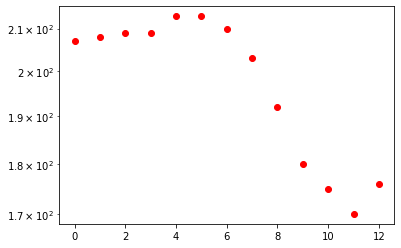

In [367]:
x = range(0,24)
y = meals_M[444]
y1= [int(x) if np.isnan(x) == False else x for x in y]
y1 = np.array(y1)
print(y)
print(y1)
y_bc = bc(x, y)
y_spl = UnivariateSpline(x,y,s=0,k=4)
plt.semilogy(x,y,'ro',label = 'data')
x_range = np.linspace(x[0],x[-1],1000)
plt.semilogy(x_range,y_spl(x_range))
plt.semilogy(x_range,y_bc(x_range))

In [369]:
new_y = np.interp(np.arange(len(y1)), 
          np.arange(len(y1))[np.isnan(y1) == False], 
          y1[np.isnan(y1) == False])
print(list(new_y))

[207.0, 208.0, 209.0, 209.0, 213.0, 213.0, 210.0, 203.0, 192.0, 180.0, 175.0, 170.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0, 176.0]


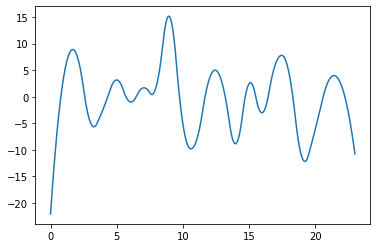

In [194]:
y_spl_2d = y_spl.derivative(n=2)
print(y_spl_2d)
plt.plot(x_range,y_spl_2d(x_range))
plt.plot(3, color='r')

In [195]:
y_spl.__call__(9, nu=2)

array(15.03267013)

[40.0, 60.0, 71.0, 83.0, 87.0, 100.0, 112.0, 121.0, 125.0, 130.0, 132.0, 123.0, 112.0, 89.0, 77.0, 69.0, 66.0, 67.0, 71.0, 75.0, 74.0, 72.0, 70.0, 67.0]
[-262.47076865-265.56177181j  -52.78460969+171.60254038j
  -61.79898987 -29.14213562j  -19.         +17.32050808j
  -31.55422875  -2.26118455j  -29.         +20.j
  -24.66631634 +11.0311573j   -13.          +3.46410162j
  -22.20101013  +0.85786438j  -11.21539031  -1.60254038j
  -29.30868626  -2.85411367j  -19.          -0.j
  -29.30868626  +2.85411367j  -11.21539031  +1.60254038j
  -22.20101013  -0.85786438j  -13.          -3.46410162j
  -24.66631634 -11.0311573j   -29.         -20.j
  -31.55422875  +2.26118455j  -19.         -17.32050808j
  -61.79898987 +29.14213562j  -52.78460969-171.60254038j
 -262.47076865+265.56177181j]


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


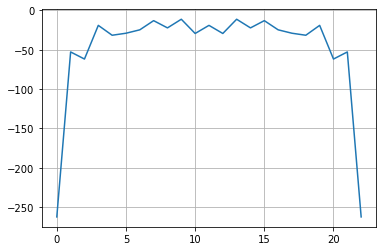

-11
13


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


In [90]:
#from scipy.fft import fft, fftfreq
y = meals_M[2]
print(y)
yf = fft(y)[1:]
print(yf)
# print(np.)
plt.plot(yf)
plt.grid()
plt.show()
print(int(np.max(yf)))
print(np.argmax(yf))
# xf = fftfreq(N, T)[:N//2]

In [4]:
class create_matricies:
    def __init__(self):
        self.cgm_1 = pd.read_csv("./CGMData.csv")
        self.insulin_1 = pd.read_csv("./InsulinData.csv")

    #Get all meal indicies
    def insulin_scrape(self, insulin_df):
        all_indicies = insulin_df[insulin_df['BWZ Carb Input (grams)'].notna() & insulin_df['BWZ Carb Input (grams)'] != 0.0].index[::-1].values
        filtered = []
        for i in range(0, len(all_indicies)):
            index = all_indicies[i]
            add_index = True
            date_time = insulin_df.iloc[index][['Date', 'Time']].values
            date_time = pd.to_datetime(date_time[0] + " "+ date_time[1])
            while True:
                index -= 1
                row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
                row_date_time = insulin_df[['Date', 'Time']].iloc[index].values
                row_date_time = pd.to_datetime(row_date_time[0] + " "+ row_date_time[1])
                if row_date_time > (date_time + pd.Timedelta(2, "h")) or index < 0:
                    break
                if not np.isnan(row):
                    add_index = False
                    break
            if add_index:
                filtered.append(all_indicies[i])
        return filtered

    #Create Data Matrix
    def create_matrix(self, insulin_df, cgm_df):
        matrix = []
        classes = np.ndarray(shape=(0,1), dtype=np.intc)
        filtered = self.insulin_scrape(insulin_df)
        carbs = []
        for index in filtered:
            row = insulin_df['BWZ Carb Input (grams)'].iloc[index]
            carbs.append(row)
        n = int(np.ceil((max(carbs) - min(carbs)) / 20))
        bins = [x for x in range(0, 20*(n), 20)]
        for i in filtered:
            row  = insulin_df['BWZ Carb Input (grams)'].iloc[i]
            date_time = insulin_df[['Date','Time']].iloc[i].values
            date_time = date_time[0] + " "+ date_time[1]
            date_time = pd.to_datetime(date_time)
            date_data = cgm_df[(pd.to_datetime(cgm_df['Date']).dt.date == date_time.date())][["Date", "Time", "Sensor Glucose (mg/dL)"]]
            lower = date_data[(pd.to_datetime(date_data['Time']).dt.time >= date_time.time())]
            upper = date_data[(pd.to_datetime(date_data['Time']).dt.time <= (date_time + pd.Timedelta(5, "m")).time())]
            if len(lower) > 0 and len(upper) > 0:
                low = lower.iloc[-1]
                up = upper.iloc[0]
                if up.name == low.name:
                    index = up.name
                    matrix.append(list(cgm_df.iloc[index-20:index+4]['Sensor Glucose (mg/dL)'][::-1]))
                    classes = np.vstack([classes, [np.digitize([row],bins)]])
        return matrix, classes

                        
    #Clean data (interpolate or remove as needed)
    def clean(self, matrix, classes):
        remove = []
        for i in range(0,len(matrix)):
            if np.isnan(matrix[i]).any():
#                 remove.append(i)
                if np.count_nonzero(np.isnan(matrix[i])) > 10:
                    remove.append(i)
                else:
                    row = [int(x) if np.isnan(x) == False else x for x in matrix[i]]
                    y1 = np.array(row)
                    new_y = np.interp(np.arange(len(y1)), 
                              np.arange(len(y1))[np.isnan(y1) == False], 
                              y1[np.isnan(y1) == False])
                    matrix[i] = list(new_y)
                    

        for i in remove[::-1]:
            matrix.pop(i)
            classes = np.delete(classes, i)
        
        return np.array(matrix, dtype=np.intc), classes.reshape(len(classes), 1)
    
    #Combine Matricies
    def combine(self, m1, m2):
#         for row in m2:
#             m1.append(row)
        return np.concatenate((m1,m2))
    
    #Do everything
    def start(self):
        print("Making Matricies")
        p1meal, p1classes = self.create_matrix(self.insulin_1, self.cgm_1)
        print("Cleaning")
        meal_matrix, class_matrix = self.clean(p1meal, p1classes)
        print("Complete")
        return meal_matrix, class_matrix


# Feature Extraction

In [5]:
cm = create_matricies()
m, classes = cm.start()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13,43) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Making Matricies
Cleaning
Complete


In [6]:
print(m)
print(len(m))

print(classes)
print(len(classes))

[[ 71  81 102 ... 184 190 195]
 [268 259 255 ... 267 267 274]
 [ 40  60  71 ...  72  70  67]
 ...
 [104 123 132 ... 162 189 201]
 [ 60  51  52 ...  80  84  86]
 [151 154 153 ... 184 178 180]]
498
[[6]
 [4]
 [4]
 [2]
 [3]
 [3]
 [4]
 [4]
 [3]
 [4]
 [6]
 [2]
 [5]
 [7]
 [1]
 [2]
 [3]
 [5]
 [1]
 [3]
 [2]
 [4]
 [5]
 [5]
 [2]
 [2]
 [3]
 [2]
 [5]
 [3]
 [2]
 [1]
 [4]
 [3]
 [2]
 [2]
 [4]
 [5]
 [4]
 [4]
 [2]
 [4]
 [2]
 [1]
 [2]
 [3]
 [2]
 [4]
 [1]
 [4]
 [3]
 [2]
 [3]
 [4]
 [2]
 [3]
 [4]
 [2]
 [1]
 [2]
 [3]
 [3]
 [3]
 [1]
 [2]
 [4]
 [1]
 [2]
 [1]
 [2]
 [2]
 [7]
 [2]
 [2]
 [3]
 [5]
 [2]
 [2]
 [3]
 [3]
 [1]
 [3]
 [5]
 [3]
 [6]
 [3]
 [3]
 [1]
 [3]
 [1]
 [2]
 [2]
 [5]
 [5]
 [3]
 [2]
 [5]
 [1]
 [2]
 [5]
 [3]
 [4]
 [6]
 [7]
 [5]
 [2]
 [2]
 [2]
 [3]
 [3]
 [1]
 [3]
 [5]
 [4]
 [3]
 [2]
 [2]
 [2]
 [3]
 [4]
 [1]
 [5]
 [2]
 [4]
 [2]
 [4]
 [5]
 [3]
 [2]
 [5]
 [3]
 [2]
 [5]
 [1]
 [3]
 [2]
 [5]
 [3]
 [3]
 [3]
 [1]
 [3]
 [2]
 [3]
 [1]
 [3]
 [4]
 [3]
 [3]
 [3]
 [1]
 [3]
 [2]
 [6]
 [4]
 [3]
 [2]
 [6]
 [3]
 [2]
 [3]

In [7]:
class feature_extract:
    def __init__(self, df):
        self.df = df
    
    #Time difference between min and peak times
    def feature_1(self, values):
        mini = min(values[0:7])
        maxi = max(values[7:])
        return np.where(values == maxi)[0][0] - np.where(values == mini)[0][0]
    
    #CGM difference between min and peak values
    def feature_2(self, values):
        mini = min(values[0:7])
        maxi = max(values[7:])
        return (maxi - mini) / mini
    
    #Differental value from min to peak values
    def feature_3(self, values):
        y_spl = UnivariateSpline(range(0,24),values,s=0,k=4)
        return y_spl.__call__(np.where(values == min(values[0:7]))[0][0], nu=1)
    
    #Double differential
    def feature_4(self, values): 
        y_spl = UnivariateSpline(range(0,24),values,s=0,k=4)
        return y_spl.__call__(np.where(values == min(values[0:7]))[0][0], nu=2)
    
    def feature_5(self, values):
        yf = fft(values)[1:]
        return np.longdouble(np.max(yf))

    def feature_6(self, values): 
        yf = fft(values)[1:]
        return np.argmax(yf)
    def feature_7(self, values): 
        return np.mean(values)
    def feature_8(self, values): 
        return np.std(values)
    
    #Create Feature Matrix
    def extract(self):
        matrix = np.ndarray(shape=(0,8), dtype=np.intc)
        for row in self.df:
            matrix = np.vstack([matrix, np.array([self.feature_1(row), self.feature_2(row), self.feature_3(row), self.feature_4(row), self.feature_5(row), self.feature_6(row), self.feature_7(row), self.feature_8(row)])])
        return matrix

In [8]:
m_f = feature_extract(m)
meal_features = m_f.extract()
print(meal_features)

[[ 23.           1.74647887  18.71372945 ...   5.         152.95833333
   29.74401784]
 [ 12.           0.25909091  -4.18824165 ...   0.         248.125
   20.0734329 ]
 [ 10.           2.3         39.05770068 ...  13.          87.20833333
   25.1246545 ]
 ...
 [ 23.           0.93269231  13.40026613 ...   1.         156.58333333
   24.74691339]
 [ 11.           2.14634146  -7.99144204 ...  21.          79.5
   28.6618213 ]
 [ 19.           0.28476821  18.72483539 ...   8.         170.
   12.36931688]]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: ComplexWarning: Casting complex values to real discards the imaginary part


In [9]:
meal_features_labels = np.concatenate((meal_features, classes), axis=1)
print(meal_features_labels)

[[ 23.           1.74647887  18.71372945 ... 152.95833333  29.74401784
    6.        ]
 [ 12.           0.25909091  -4.18824165 ... 248.125       20.0734329
    4.        ]
 [ 10.           2.3         39.05770068 ...  87.20833333  25.1246545
    4.        ]
 ...
 [ 23.           0.93269231  13.40026613 ... 156.58333333  24.74691339
    4.        ]
 [ 11.           2.14634146  -7.99144204 ...  79.5         28.6618213
    1.        ]
 [ 19.           0.28476821  18.72483539 ... 170.          12.36931688
    2.        ]]


In [10]:
df = pd.DataFrame(data=meal_features_labels, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'class'])
print(df)

       f1        f2         f3          f4          f5    f6          f7  \
0    23.0  1.746479  18.713729  -41.890516  -53.000000   5.0  152.958333   
1    12.0  0.259091  -4.188242   19.390328  204.435384   0.0  248.125000   
2    10.0  2.300000  39.057701  -60.233443  -11.215390  13.0   87.208333   
3    14.0  0.180328  -3.175932    5.081660  176.909520   0.0  194.375000   
4    11.0  0.745902  -2.021605    7.058327   58.971143   1.0  169.875000   
..    ...       ...        ...         ...         ...   ...         ...   
493  20.0  1.824324  74.012331 -133.910838   28.421296   0.0  149.958333   
494   5.0  0.100000   0.234705   -4.728158  140.210236  21.0  199.875000   
495  23.0  0.932692  13.400266   28.495570   76.514083   1.0  156.583333   
496  11.0  2.146341  -7.991442   16.721186   59.042940  21.0   79.500000   
497  19.0  0.284768  18.724835  -52.163533   -6.878680   8.0  170.000000   

            f8  class  
0    29.744018    6.0  
1    20.073433    4.0  
2    25.124655 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 9 columns):
f1       498 non-null float128
f2       498 non-null float128
f3       498 non-null float128
f4       498 non-null float128
f5       498 non-null float128
f6       498 non-null float128
f7       498 non-null float128
f8       498 non-null float128
class    498 non-null float128
dtypes: float128(9)
memory usage: 70.2 KB


In [12]:
df.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,class
f1,1.000000,0.521869,0.045737,-0.000190,-0.303229,-0.619751,-0.103556,0.037556,0.141880
f2,0.521869,1.000000,-0.011430,0.085595,-0.379291,-0.518323,-0.194619,0.326811,0.163342
f3,0.045737,-0.011430,1.000000,-0.815910,-0.257446,-0.034386,0.065004,-0.176882,-0.066761
f4,-0.000190,0.085595,-0.815910,1.000000,0.047489,-0.004441,0.027064,0.143068,0.053271
f5,-0.303229,-0.379291,-0.257446,0.047489,1.000000,0.279866,-0.072339,0.096143,0.113512
f6,-0.619751,-0.518323,-0.034386,-0.004441,0.279866,1.000000,0.073533,-0.035382,-0.130127
f7,-0.103556,-0.194619,0.065004,0.027064,-0.072339,0.073533,1.000000,0.356474,-0.089834
f8,0.037556,0.326811,-0.176882,0.143068,0.096143,-0.035382,0.356474,1.000000,0.085427
class,0.141880,0.163342,-0.066761,0.053271,0.113512,-0.130127,-0.089834,0.085427,1.000000


In [13]:
np.random.seed(42)

In [118]:
# X = df[['f1', 'f2', 'f3','f5','f6']].copy()
# X = df[['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']].copy()
X = df[['f3','f4']].copy()

y_truth = df['class'].copy()

In [59]:
print(y_truth[0])

6.0


# Train Model

In [60]:
from sklearn.cluster import KMeans

In [114]:
output = []
for i in range(1,256):
    bin_i = format(i, '8b')
    features = []
    if bin_i[0] == '1':
        features.append('f8')
    if bin_i[1] == '1':
        features.append('f7')
    if bin_i[2] == '1':
        features.append('f6')
    if bin_i[3] == '1':
        features.append('f5')
    if bin_i[4] == '1':
        features.append('f4')
    if bin_i[5] == '1':
        features.append('f3')
    if bin_i[6] == '1':
        features.append('f2')
    if bin_i[7] == '1':
        features.append('f1')
    training_data = df[features].copy()
    kmeans = KMeans(n_clusters=7, init='random', n_init=20, random_state=42).fit(training_data)
    k_means_sse = int(len(y_truth) * mean_squared_error(y_truth, kmeans.labels_ + 1))
    output.append(k_means_sse)
print(output)
    

[]
[3466, 5211, 3882, 4955, 2670, 4955, 3491, 5642, 3992, 5642, 3992, 2985, 2072, 2985, 3149, 3967, 3979, 3975, 3979, 3861, 3810, 3861, 3810, 3559, 3591, 3559, 4843, 4871, 3573, 4876, 3573, 3344, 4466, 3399, 3617, 4133, 4298, 4133, 4302, 2923, 4149, 2923, 4149, 4402, 4401, 4450, 4401, 3212, 5100, 3212, 5100, 3948, 3976, 3948, 3976, 3559, 3599, 3559, 3599, 4836, 3544, 4836, 3544, 4012, 4454, 4237, 4454, 3519, 3468, 3544, 3544, 5040, 5063, 5040, 5063, 5002, 5023, 5026, 5023, 4008, 3989, 4008, 3989, 4616, 4623, 4616, 4623, 4324, 4350, 4324, 4350, 4523, 4523, 4523, 4523, 4133, 4271, 4133, 4209, 3468, 3476, 3468, 3476, 4993, 5002, 5002, 5002, 4587, 5008, 4587, 5008, 4371, 2798, 4371, 2798, 4157, 4125, 4157, 4125, 4352, 4333, 4352, 4333, 4789, 4523, 4789, 4523, 4215, 3409, 4215, 3416, 4717, 2145, 4881, 3744, 3125, 3125, 3133, 3125, 3347, 3330, 3347, 3330, 3677, 3629, 3677, 3629, 3632, 3648, 3632, 3649, 3610, 3578, 3610, 3578, 3544, 3544, 3544, 3544, 4013, 3867, 4013, 3831, 3565, 3744, 3565, 

In [117]:
outp = np.array(output)
print(np.min(outp))
print(format(np.argmin(outp), '8b'))

2072
    1100


In [119]:
# kmeans = KMeans(n_clusters=7, init='k-means++', n_init=20, random_state=42).fit(X)
kmeans = KMeans(n_clusters=7, init='random', n_init=20, random_state=42).fit(X)

k_means_pred = kmeans.labels_ + 1
print(k_means_pred)

[7 3 7 3 3 6 3 3 7 5 5 6 3 3 6 3 5 7 7 7 6 3 6 3 3 3 7 3 3 6 3 3 3 3 3 6 3
 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 6 3 7 7 3 5 5 3 3 3 3 3 3 3 3 3 3 7 3 3 2
 3 3 3 3 6 6 3 3 6 3 3 1 7 5 3 3 1 3 3 3 3 6 3 6 7 3 3 3 3 5 6 3 3 7 5 3 6
 3 3 3 3 6 3 5 3 3 5 6 3 6 3 3 6 3 3 3 3 3 3 3 2 3 6 7 5 3 6 3 3 3 6 3 3 3
 3 1 3 3 3 3 3 6 6 3 6 6 3 3 3 3 3 3 7 3 6 5 3 7 5 3 4 4 1 6 1 5 3 3 3 6 6
 6 3 3 3 3 3 3 5 1 5 3 6 3 3 3 6 5 3 3 6 6 3 3 5 3 3 6 6 3 3 3 3 3 6 3 7 6
 6 5 3 6 6 6 4 5 6 3 7 3 3 3 1 5 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 7 3 4 6 3
 3 3 3 3 3 3 5 2 3 3 3 5 3 6 3 3 3 6 3 2 7 5 3 6 1 6 3 6 3 5 3 3 7 3 3 3 3
 3 6 3 3 6 3 3 3 2 6 3 3 4 6 7 3 3 3 3 6 3 6 3 6 3 3 5 3 3 3 3 2 3 3 3 3 7
 3 3 3 3 3 3 6 3 3 5 3 7 1 3 3 3 5 3 4 3 3 3 3 3 6 1 7 5 3 2 3 3 6 2 3 5 3
 3 5 3 3 3 6 3 3 3 3 3 5 3 3 3 7 6 3 6 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 5 6
 3 1 6 2 3 6 6 3 2 7 7 5 6 3 5 3 3 3 6 6 7 3 6 3 5 3 3 3 3 1 3 3 3 3 3 3 5
 7 7 3 6 6 4 3 3 7 3 3 5 7 5 5 7 3 3 3 3 3 6 3 3 7 3 3 3 3 3 6 3 7 6 3 2 3
 7 6 7 3 6 3 1 3 7 2 3 6 

In [39]:
from sklearn.cluster import DBSCAN

In [122]:
# clustering = DBSCAN(eps=5, min_samples=3).fit(X)
# clustering = DBSCAN(eps=20, min_samples=6).fit(X)
clustering = DBSCAN(eps=10, min_samples=2).fit(X)


dbscan_pred = clustering.labels_ +1
print(dbscan_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 0 3 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 6 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 2 1 1 1 6 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 7 1 0 1 1 1 1 8 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1
 1 1 1 1 1 1 2 1 0 0 1 1 

In [41]:
from sklearn.neighbors import NearestNeighbors

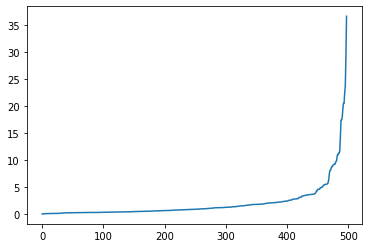

In [132]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

# Evaluate

## SSE

In [20]:
from sklearn.metrics import mean_squared_error

In [124]:
k_means_sse = int(len(y_truth) * mean_squared_error(y_truth, k_means_pred))
print(k_means_sse)

2985


In [125]:
dbscan_sse = int(len(y_truth) * mean_squared_error(y_truth, dbscan_pred))
print(dbscan_sse)

2414


Matricies

In [126]:
kmeans_M = []
kmeans_M = np.ndarray(shape=(7,7), dtype=np.intc)
bins = [x for x in range(1,8)]
for i in range(0,len(k_means_pred)):
    value = k_means_pred[i]
    if value not in bins:
        value = 7    
    kmeans_M[value - 1][int(y_truth[i]) - 1] += 1
print(kmeans_M)

[[ 33  43  42  13   8   4   1]
 [ 14  17  22   8   2   4   0]
 [ 85 136 118  67  31   9   3]
 [ 24  37  26  18   8   2   1]
 [ 55  88  66  38  15   5   2]
 [ 43  58  37  26  18   1   1]
 [ 55  89  70  31  14   5   1]]


In [127]:
dbscan_M = []
dbscan_M = np.ndarray(shape=(7,7), dtype=np.intc)
for i in range(0,len(dbscan_pred)):
    value = dbscan_pred[i]
    if value not in bins:
        value = 7    
    dbscan_M[value - 1][int(y_truth[i]) - 1] += 1
print(dbscan_M)

[[763 992 753 396 212  51  21]
 [  2 170  23  18   0   1   0]
 [  1   4 134   3   1   4   0]
 [  5   5   6  67   0   0   0]
 [  4  10   8   9  36   0   0]
 [  3   6   1   4   0  10   0]
 [ 46  61  91  39   7  14   3]]


In [84]:
true_M = []
true_M = np.ndarray(shape=(7,7), dtype=np.intc)
for i in range(0,len(y_truth)):
    value = int(y_truth[i])    
    true_M[value - 1][int(y_truth[i]) - 1] += 1
print(true_M)

[[206   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0]
 [  0   0 254   0   0   0   0]
 [  0   0   0 134   0   0   0]
 [  0   0   0   0  64   0   0]
 [  0   0   0   0   0  20   0]
 [  0   0   0   0   0   0   6]]


## Entropy

In [25]:
from sklearn.metrics.cluster import homogeneity_score

In [26]:
k_means_ent = homogeneity_score(y_truth, k_means_pred)
print(k_means_ent)

0.03121279667576272


In [128]:
running_list = 0
for row in kmeans_M:
    summ = 0
#     print(row)
    row_tot = np.sum(row)
    for item in row:
#         print(item)
#         print(row_tot)
        if item != 0:
            summ += -(item/row_tot) * np.log2(item/row_tot)
    running_list += row_tot * summ
k_means_ent = running_list / np.sum(kmeans_M)
print(k_means_ent)

2.286297516418802


In [51]:
dbscan_ent = homogeneity_score(y_truth, dbscan_pred)
print(dbscan_ent)

0.07400394148234385


In [129]:
running_list = 0
for row in dbscan_M:
    summ = 0
#     print(row)
    row_tot = np.sum(row)
    for item in row:
#         print(item)
#         print(row_tot)
        if item != 0:
            summ += -(item/row_tot) * np.log2(item/row_tot)
    running_list += row_tot * summ
dbscan_ent = running_list / np.sum(dbscan_M)
print(dbscan_ent)

2.1231652597962785


## Purity

In [32]:
running_list = 0
for row in kmeans_M:
    summ = []
    row_tot = np.sum(row)
    print(row_tot)
    for item in row:
        summ.append(item/row_tot)
    print(summ)
    print(max(summ))
    running_list += row_tot * max(summ)
k_means_purity = running_list / np.sum(kmeans_M)
print(k_means_purity)

117
[0.23931623931623933, 0.3162393162393162, 0.27350427350427353, 0.09401709401709402, 0.05982905982905983, 0.008547008547008548, 0.008547008547008548]
0.3162393162393162
13
[0.07692307692307693, 0.15384615384615385, 0.38461538461538464, 0.07692307692307693, 0.07692307692307693, 0.23076923076923078, 0.0]
0.38461538461538464
21
[0.047619047619047616, 0.23809523809523808, 0.3333333333333333, 0.3333333333333333, 0.047619047619047616, 0.0, 0.0]
0.3333333333333333
40
[0.125, 0.35, 0.3, 0.175, 0.025, 0.025, 0.0]
0.35
102
[0.13725490196078433, 0.37254901960784315, 0.30392156862745096, 0.11764705882352941, 0.058823529411764705, 0.00980392156862745, 0.0]
0.37254901960784315
84
[0.27380952380952384, 0.30952380952380953, 0.14285714285714285, 0.14285714285714285, 0.10714285714285714, 0.011904761904761904, 0.011904761904761904]
0.30952380952380953
121
[0.256198347107438, 0.2809917355371901, 0.23140495867768596, 0.14049586776859505, 0.05785123966942149, 0.024793388429752067, 0.008264462809917356]
0

In [130]:
running_list = 0
for row in dbscan_M:
    summ = []
    row_tot = np.sum(row)
    for item in row:
        summ.append(item/row_tot)
    print(summ)
    print(max(summ))
    running_list += row_tot * max(summ)
dbscan_purity = running_list / np.sum(dbscan_M)
print(dbscan_purity)

[0.23933500627352572, 0.3111668757841907, 0.236198243412798, 0.12421580928481807, 0.06649937264742785, 0.015997490589711418, 0.006587202007528231]
0.3111668757841907
[0.009345794392523364, 0.794392523364486, 0.10747663551401869, 0.08411214953271028, 0.0, 0.004672897196261682, 0.0]
0.794392523364486
[0.006802721088435374, 0.027210884353741496, 0.9115646258503401, 0.02040816326530612, 0.006802721088435374, 0.027210884353741496, 0.0]
0.9115646258503401
[0.060240963855421686, 0.060240963855421686, 0.07228915662650602, 0.8072289156626506, 0.0, 0.0, 0.0]
0.8072289156626506
[0.05970149253731343, 0.14925373134328357, 0.11940298507462686, 0.13432835820895522, 0.5373134328358209, 0.0, 0.0]
0.5373134328358209
[0.125, 0.25, 0.041666666666666664, 0.16666666666666666, 0.0, 0.4166666666666667, 0.0]
0.4166666666666667
[0.17624521072796934, 0.23371647509578544, 0.3486590038314176, 0.14942528735632185, 0.02681992337164751, 0.05363984674329502, 0.011494252873563218]
0.3486590038314176
0.37650602409638556

In [152]:
import csv

In [179]:
f = open('./Result.csv', 'w')
writer = csv.writer(f)
writer.writerow([k_means_sse, dbscan_sse, k_means_ent, dbscan_ent, k_means_purity, dbscan_purity])
f.close()